In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel
import scipy.stats as stats
import arviz as az

F = len('Agnieszka')
L = len('Welian')

Exercise 1 - Generated Quantities Block

[0, 0, 0, 0, 0, 0, 0, 0, 0]


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.



      lp__  accept_stat__     lambda  y_sim[1]  y_sim[2]  y_sim[3]  y_sim[4]  \
0      0.0            0.0   19.35390      22.0      18.0      24.0      17.0   
1      0.0            0.0  101.22000     116.0      87.0      87.0     113.0   
2      0.0            0.0    3.81025       3.0       3.0       1.0       1.0   
3      0.0            0.0   81.59390      88.0      68.0      77.0      78.0   
4      0.0            0.0   96.90130     109.0      88.0      89.0     104.0   
...    ...            ...        ...       ...       ...       ...       ...   
3995   0.0            0.0  158.96100     159.0     174.0     162.0     162.0   
3996   0.0            0.0  149.20200     133.0     145.0     152.0     128.0   
3997   0.0            0.0   54.34440      57.0      67.0      53.0      42.0   
3998   0.0            0.0   55.15310      49.0      55.0      62.0      58.0   
3999   0.0            0.0   77.60160      66.0     100.0      84.0      75.0   

      y_sim[5]  y_sim[6]  y_sim[7]  y_

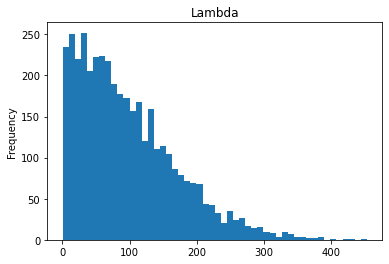

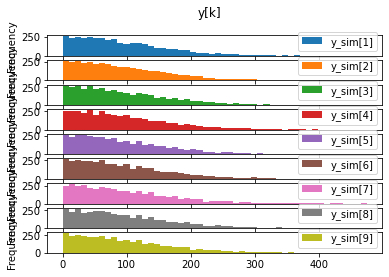

In [4]:
array_sample = [0] * F
print(array_sample)
stan_data = {
    "M":F,
    "y":array_sample
}
model = CmdStanModel(stan_file='code_1.stan')
sample = model.sample(stan_data)

data_from_stan = sample.draws_pd()
print(data_from_stan)

Lambda = data_from_stan['lambda']
Lambda.plot.hist(bins=50, title = 'Lambda')

data_all_y = data_from_stan.drop(data_from_stan.columns[0:3],axis=1)
data_all_y.plot.hist(subplots=True, bins=50, title = 'y[k]')
plt.show()

Excercise 2 - Constraints on the data

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


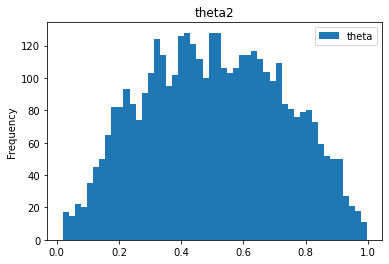

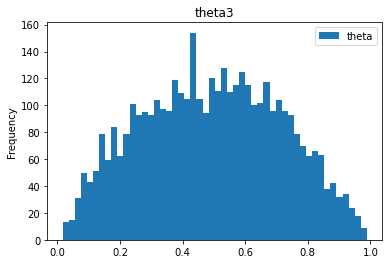

In [5]:
stan_data = {
    "N":2,
    # "theta": 1,
    "y": [0,1] #cannot set 'y':[0,2] - out of range
}

model2 = CmdStanModel(stan_file='code_2.stan')
sample_model2 = model2.sample(stan_data)
theta2 = sample_model2.stan_variable('theta')

df2 = pd.DataFrame({'theta': theta2})
df2.plot.hist(bins=50, title ='theta2')

model3 = CmdStanModel(stan_file='code_3.stan')
sample_model3 = model3.sample(stan_data)
theta3 = sample_model3.stan_variable('theta')

df = pd.DataFrame({'theta': theta3})
df.plot.hist(bins=50, title ='theta3')
plt.show()

Excercise 3 - Constraints on parameters

In [3]:
model4 = CmdStanModel(stan_file='code_4.stan')
sample4 = model4.sample(output_dir='samples')
sample4.diagnose()

N=1000
x4 = np.linspace(0,8,N)
probability_density_fun4 = stats.gamma.pdf(x4, 1.25, scale = 1 / 1.25)
plt.plot(x4, probability_density_fun4, linewidth=1)

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")


model5 = CmdStanModel(stan_file='code_5.stan')
sample5 = model5.sample(output_dir='samples')
sample5.diagnose()

N=1000
x5 = np.linspace(0,8,N)
probability_density_fun5 = stats.gamma.pdf(x5, 1.25, scale = 1 / 1.25)
plt.plot(x5, probability_density_fun5, linewidth=2)

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |██████████| 00:02 Sampling completed
chain 2 |██████████| 00:02 Sampling completed

chain 3 |██████████| 00:02 Sampling completed
chain 4 |██████████| 00:02 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Agnieszka\\Desktop\\Sem 8\\Data Analytics\\DataA\\Data-Analytics\\Lab2\\samples\\code_4-20220316181041_1.csv'

Excercise 4 - Selection of parameters using equation solving

In [19]:
stan_data = {
    "y_guess":[1],
    "theta":[(F+L)/2]
}

model6 = CmdStanModel(stan_file='code_6.stan')
tunes = model6.sample(data=stan_data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)
tunes.draws_pd()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,sigma
0,0.0,0.0,2.91168


Excercise 5 - different methods of defining models

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |█████████ | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)



chain 1 |█████████ | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)
chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)




chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


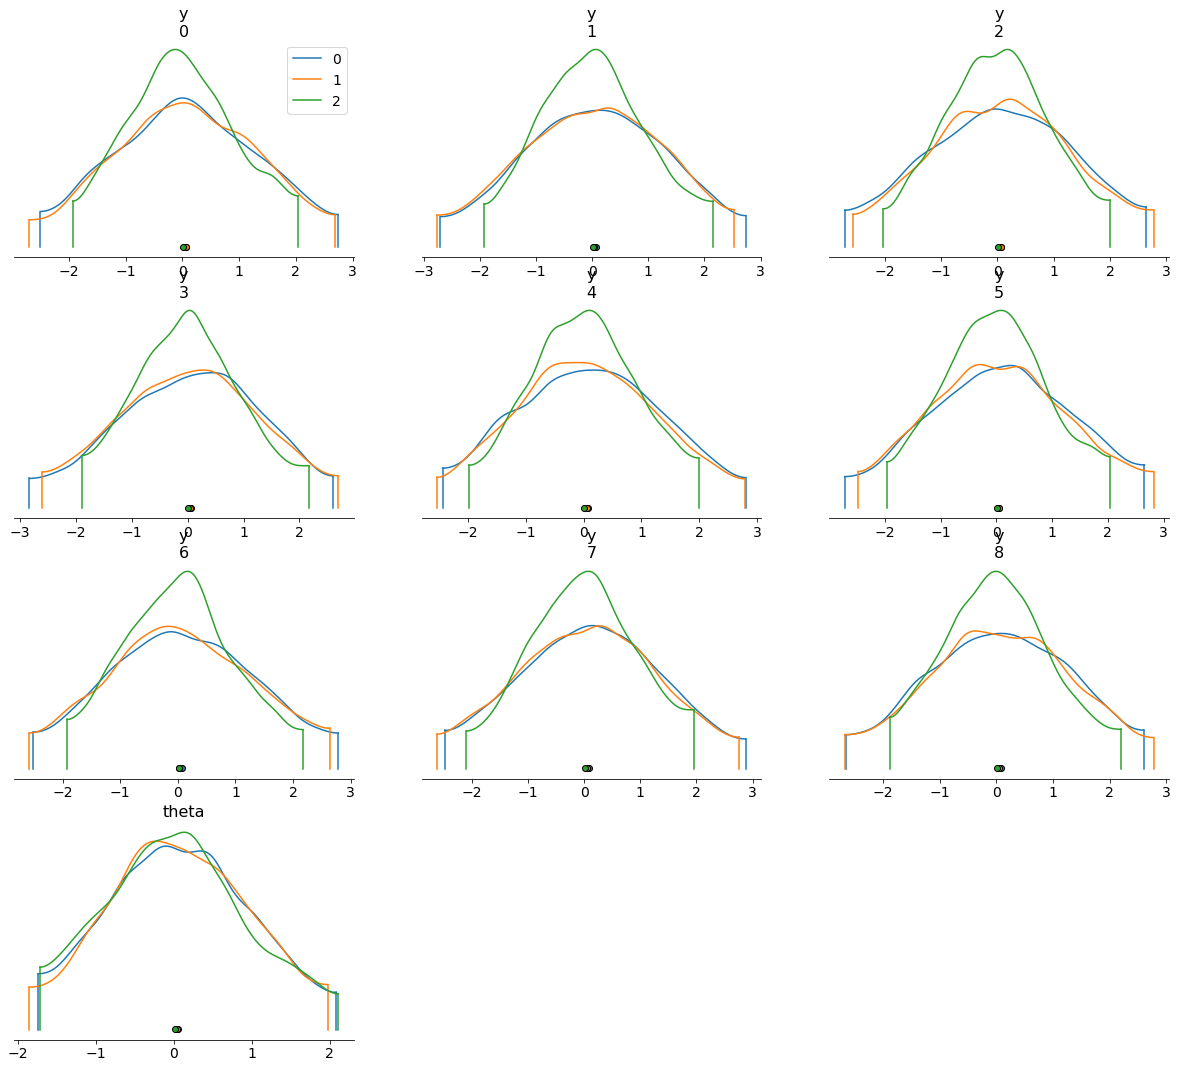

In [12]:
stan_data = {
    "N":F
}

model7 = CmdStanModel(stan_file='code_7.stan')
model8 = CmdStanModel(stan_file='code_8.stan')
model9 = CmdStanModel(stan_file='code_9.stan')
sample7 = model7.sample(stan_data)
sample8 = model8.sample(stan_data)
sample9 = model9.sample(stan_data)

az.plot_density([sample7,sample8,sample9])
plt.show()


Excercise 6 - generated quantities post sampling

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:01 Iteration: 1900 / 2000 [ 95%]  (Sampling)

chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [4] done processing


[-0.258153  -0.444297  -0.0128026 ...  2.53668    2.53876    2.58446  ]


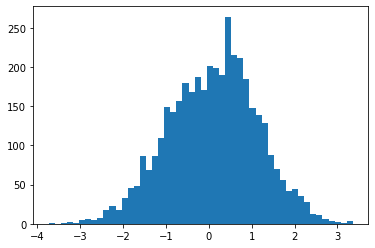

In [14]:
stan_data = {
    "N":F
}
model9 = CmdStanModel(stan_file='code_9.stan')
sample9 = model9.sample(stan_data)

model10 = CmdStanModel(stan_file='code_10.stan')
# sample10 = model10.sample(stan_data)
y_mean = model10.generate_quantities(data=stan_data, mcmc_sample = sample9)
df = y_mean.stan_variable('mean_y')
print(df)
plt.hist(df, bins=50)
plt.show()